In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#df_All = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-20-23 No Fluff\df_All_Avg.csv")

df_All = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\3 Final Machine Butanol\df_CDCA6.csv")


In [4]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [ ]:
# List of columns to exclude to run XGboost feature selection
exclude_columns = ['Date', 'FFC55553' ,'LC55555', 'FC55003', 'LC55557', 'TI55021', 'LC55553', 'FFC55555']

# Create a new DataFrame without the excluded columnsd
df_All = df_All.drop(columns=exclude_columns)

In [5]:
df_All.columns

Index(['Butanol', '425 %Al', 'TC55552', 'DI55152', 'DI55102', 'AYC55580',
       'FC55569', 'FC55555', 'FFC55553', 'FC55576', 'FC55009', 'TI55023',
       'LC55555', 'FC55003', 'LC55557', 'TI55021', 'LC55553', 'FFC55555',
       'Date'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from itertools import chain, combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Sample dataset
data = pd.read_csv("your_data.csv")  # Replace with your data source

# Splitting into train and test
X = data.drop('target', axis=1)  # Assuming 'target' is your target column
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Get all possible feature combinations
features = X.columns
all_combinations = list(chain(*map(lambda i: combinations(features, i), range(1, len(features)+1))))

results = []

for combo in all_combinations:
    X_train_subset = X_train[list(combo)]
    X_test_subset = X_test[list(combo)]
    
    lr = LinearRegression()
    lr.fit(X_train_subset, y_train)
    y_pred = lr.predict(X_test_subset)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, X_test_subset.shape[0], X_test_subset.shape[1])
    rmse = np.sqrt(mse)
    
    results.append({
        'features': combo,
        'MSE': mse,
        'MAE': mae,
        'R^2': r2,
        'Adjusted R^2': adj_r2,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results)
print(results_df)


In [23]:
df_All = df_All[[
                #'425 %Al', 
                 'FFC55555', 'Butanol'
                 ]]


In [24]:
print(df_All.describe())

           FFC55555       Decanol
count  65550.000000  65550.000000
mean       0.773855      2.886158
std        0.021522      1.708784
min        0.702031      0.000976
25%        0.759582      1.520000
50%        0.777739      2.613510
75%        0.789522      3.970000
max        0.845451      8.440000


In [25]:
# non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
# print(non_numeric_cols)

In [26]:
# Separating dependent and independent variables
X = df_All.drop('Decanol', axis=1)
y = df_All['Decanol']


In [27]:
model = LinearRegression()

In [28]:
# # Split data into features (X) and target (y)
# X = df_All.drop('Decanol', axis=1)  # Replace 'target_column_name' with the name of your target column
# y = df_All['Decanol']

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Fitting the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [32]:
# Printing coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.05226101]
Intercept: 2.8841807740451757


In [33]:
# Predict using the testing set
y_pred = model.predict(X_test_scaled)

In [34]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.887489564484004


In [35]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.6992614761960574


In [36]:
from sklearn.metrics import r2_score


# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.2f}")

R-squared value: 0.00


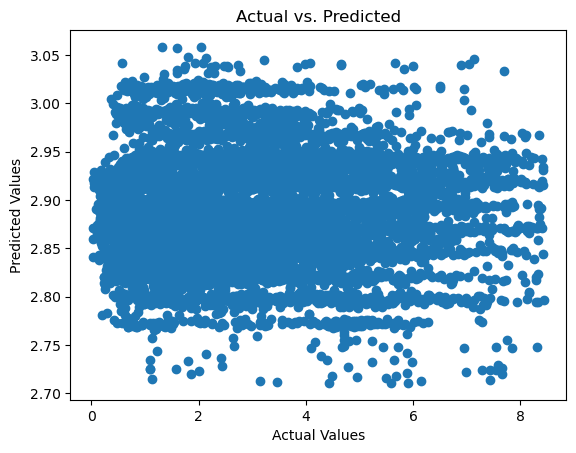

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()


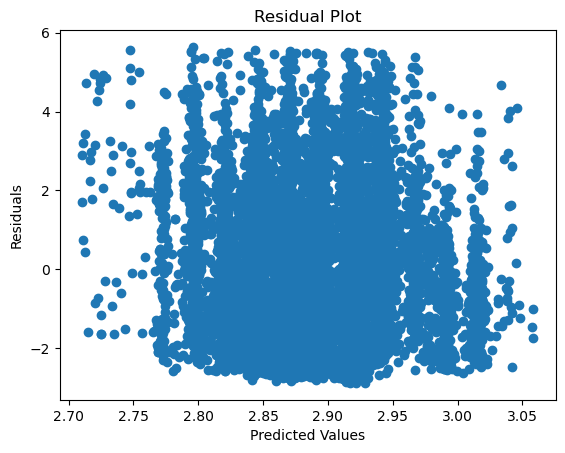

In [38]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
